**[matplotlib学习笔记(IV)](https://matplotlib.org/stable/tutorials/colors/index.html)**  
@author: Rui Zhu  
@creation time: 2023-02-09  

In [6]:
%config InlineBackend.figure_format = 'svg'

# 1. [指定颜色](https://matplotlib.org/stable/tutorials/colors/colors.html#specifying-colors)

## 1.1 [matplotlib支持的颜色格式](https://matplotlib.org/stable/tutorials/colors/colors.html#color-formats)
* RGB or RGBA 元组
* 不区分大小写的十六进制RGB/RGBA字符串
* [0, 1]灰度值
* 单个字母的简单颜色名

* 不区分大小写且无空格的X11/CSS4颜色名
* 不区分大小写的xkcd颜色名
* 来自T0分类调色板的不区分大小写的Tableau颜色名
* CN颜色规范中的颜色名

## 1.2 [透明度alpha](https://matplotlib.org/stable/tutorials/colors/colors.html#transparency)
* 0:透明; 1:不透明

(-0.2, 13.0, -1.0, 1.0)

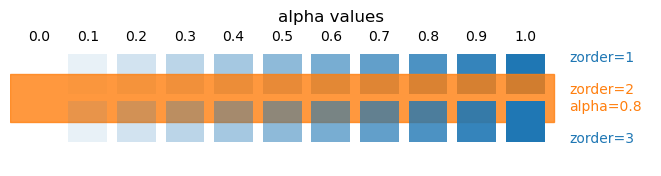

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

fig, ax = plt.subplots(figsize=(6.5, 1.65), layout='constrained')
ax.add_patch(Rectangle((-0.2, -0.35), 11.2, 0.7, color='C1', alpha=0.8))
for i, alpha in enumerate(np.linspace(0, 1, 11)):
    ax.add_patch(Rectangle((i, 0.05), 0.8, 0.6, alpha=alpha, zorder=0))
    ax.text(i+0.4, 0.85, f"{alpha:.1f}", ha='center')
    ax.add_patch(Rectangle((i, -0.05), 0.8, -0.6, alpha=alpha, zorder=2))
ax.set_xlim(-0.2, 13)
ax.set_ylim(-1, 1)
ax.set_title('alpha values')
ax.text(11.3, 0.6, 'zorder=1', va='center', color='C0')
ax.text(11.3, 0, 'zorder=2\nalpha=0.8', va='center', color='C1')
ax.text(11.3, -0.6, 'zorder=3', va='center', color='C0')
ax.axis('off')

# 2. [自定义colorbar](https://matplotlib.org/stable/tutorials/colors/colorbar_only.html)

## 2.1 [连续颜色的colorbar](https://matplotlib.org/stable/tutorials/colors/colorbar_only.html#basic-continuous-colorbar)

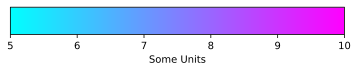

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=5, vmax=10)

fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=ax, orientation='horizontal', label='Some Units'
    )

## 2.2 [离散颜色的colorbar](https://matplotlib.org/stable/tutorials/colors/colorbar_only.html#extended-colorbar-with-continuous-colorscale)

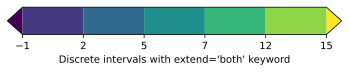

In [8]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.viridis
bounds = [-1, 2, 5, 7, 12, 15]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword")

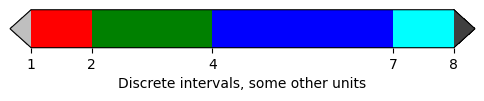

In [10]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

# 使用ListedColormap生成离散的colormap
cmap = (
    mpl.colors.ListedColormap(['red', 'green', 'blue', 'cyan']).with_extremes(over='0.25', under='0.75')
        )  # 0.25和0.75表示的灰度颜色

# 将颜色与索引长度对应, 数值与颜色对应都是0-1
bounds = [1, 2, 4, 7, 8]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=ax,
    extend='both',
    ticks=bounds,
    spacing='proportional',
    orientation='horizontal',
    label='Discrete intervals, some other units',
)

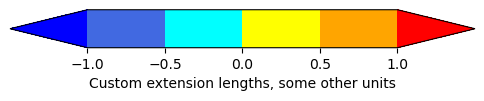

In [11]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = (mpl.colors.ListedColormap(['royalblue', 'cyan', 'yellow', 'orange'])
        .with_extremes(over='red', under='blue'))

bounds = [-1.0, -0.5, 0.0, 0.5, 1.0]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=ax,
    extend='both',
    extendfrac='auto',
    ticks=bounds,
    spacing='uniform',
    orientation='horizontal',
    label='Custom extension lengths, some other units',
)

plt.show()

# 3. [创建颜色映射](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html#)
* 第三方创建的colormap: [palettable](https://jiffyclub.github.io/palettable/)
* 颜色映射就是将数据映射到0-1之间, 对应一组颜色

## 3.1 获取已有colormaps的值
* colormap可由`ListedColormap`和`LinearSegmentedColormap`创建

第1种colormap: ListedColormap

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# resampled方法使得value和离散化的颜色区间一一对应, 离散区间越多, 颜色越精细
viridis = mpl.colormaps['viridis'].resampled(8)

# 生成viridis可以调用, 输入0-1的颜色值, 返回RGBA颜色值
print(viridis(0.56))

(0.122312, 0.633153, 0.530398, 1.0)


In [24]:
# 查看离散化之后的颜色段的颜色值
viridis.colors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.275191, 0.194905, 0.496005, 1.      ],
       [0.212395, 0.359683, 0.55171 , 1.      ],
       [0.153364, 0.497   , 0.557724, 1.      ],
       [0.122312, 0.633153, 0.530398, 1.      ],
       [0.288921, 0.758394, 0.428426, 1.      ],
       [0.626579, 0.854645, 0.223353, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

In [26]:
# 前3个颜色段的颜色
viridis(range(3))

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.275191, 0.194905, 0.496005, 1.      ],
       [0.212395, 0.359683, 0.55171 , 1.      ]])

第2种: LinearSegmentedColormap

In [29]:
copper = mpl.colormaps['copper'].resampled(8)
type(copper)

matplotlib.colors.LinearSegmentedColormap

In [33]:
# LinearSegmentedColormap实例没有colors属性, 采用这个方法查看颜色
copper(range(8))

array([[0.        , 0.        , 0.        , 1.        ],
       [0.17647055, 0.1116    , 0.07107143, 1.        ],
       [0.35294109, 0.2232    , 0.14214286, 1.        ],
       [0.52941164, 0.3348    , 0.21321429, 1.        ],
       [0.70588219, 0.4464    , 0.28428571, 1.        ],
       [0.88235273, 0.558     , 0.35535714, 1.        ],
       [1.        , 0.6696    , 0.42642857, 1.        ],
       [1.        , 0.7812    , 0.4975    , 1.        ]])

## 3.1 [创建listed colormaps](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html#creating-linear-segmented-colormaps)